In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# from pptoolbox.visualization import initialize_theme
# cmaps = initialize_theme()

# import

In [2]:
version = "v2"

import_folder = Path("../data/processed") / version / "full"

X = pd.read_csv(import_folder / "input.csv", index_col=0)
y = pd.read_csv(import_folder / "label.csv", index_col=0)
y_meta = pd.read_csv(import_folder / "meta.csv", index_col=0)

print(f"Shapes of X, y, y_meta: {X.shape}, {y.shape}, {y_meta.shape}")

Shapes of X, y, y_meta: (342, 191), (342, 1), (342, 4)


In [3]:
y.value_counts()

Condition
MDD          158
Controls     132
BD            34
BPD           18
Name: count, dtype: int64

In [4]:
y

# drop duplicates by index
y_nodup = y[~y.index.duplicated(keep='first')]
y_nodup.shape

(167, 1)

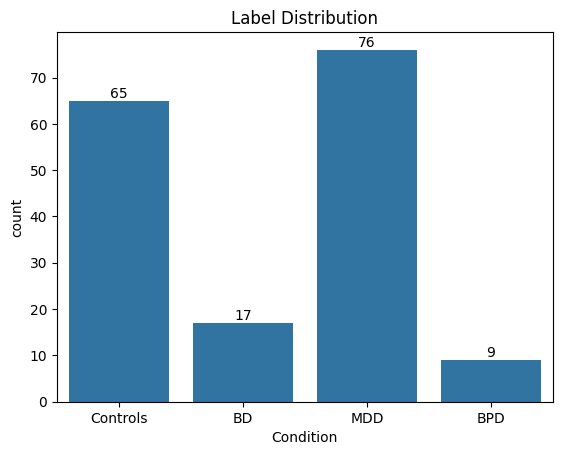

In [5]:
fig = plt.figure()

sns.countplot(data=y_nodup, x="Condition")
plt.title("Label Distribution")

# add count label on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

output_folder = Path("../data/visualisation") / version / "y_eda"
output_folder.mkdir(parents=True, exist_ok=True)

fig.savefig(output_folder / "label_distribution.png", bbox_inches='tight')
plt.show()
plt.close()

In [6]:
lot_frequency = y[y['Condition'].isin(['Controls','MDD'])].copy().reset_index().groupby(['Condition', 'lot_id']).size().reset_index(name='frequency')

# Count how many lot_ids appear 1, 2, 3, 4+ times within each condition
frequency_distribution = lot_frequency.groupby(['Condition', 'frequency']).size().reset_index(name='num_lot_ids')
print("For each condition, number of lot_ids that appear N times:")
print(frequency_distribution)

For each condition, number of lot_ids that appear N times:
  Condition  frequency  num_lot_ids
0  Controls          2           63
1  Controls          3            2
2       MDD          1            1
3       MDD          2           68
4       MDD          3            7


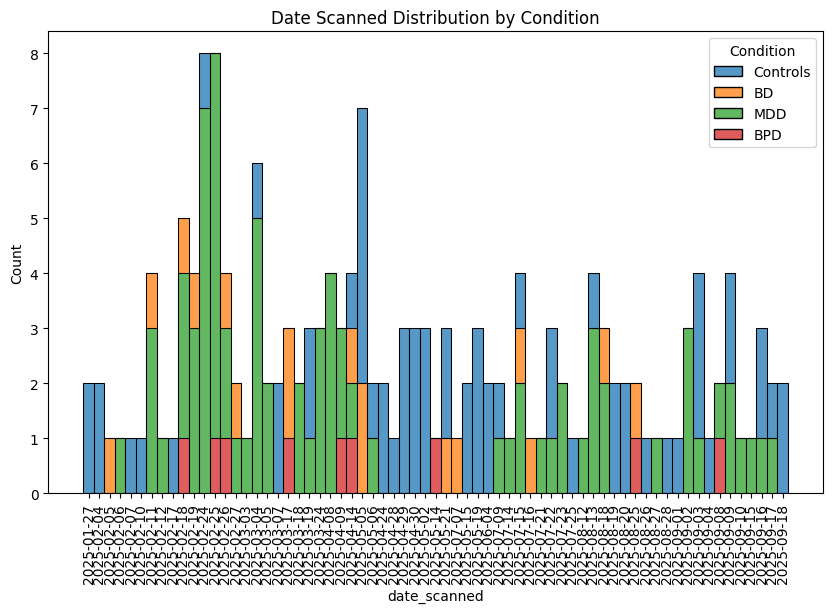

In [6]:
fig = plt.figure(figsize=(10,6))

# Merge the dataframes
merged_df = y_meta.merge(y, left_index=True, right_index=True, how='inner')
merged_nodup = merged_df[~merged_df.index.duplicated(keep='first')]

sns.histplot(data=merged_nodup, x="date_scanned", hue="Condition", multiple="stack")
plt.xticks(rotation=90)
plt.title("Date Scanned Distribution by Condition")

# Force integer y-ticks
from matplotlib.ticker import MaxNLocator
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))


fig.savefig(output_folder / "date_scanned_distribution.png", bbox_inches='tight')
plt.show()
plt.close()